Digite o título do livro: asf
Digite o autor do livro: awd
Digite o gênero do livro: afed
Digite a quantidade disponível: 1

✅ Livro 'asf' cadastrado com sucesso!

Deseja cadastrar outro livro? (s/n): s
Digite o título do livro: aef
Digite o autor do livro: qef
Digite o gênero do livro: afd
Digite a quantidade disponível: 3

✅ Livro 'aef' cadastrado com sucesso!

Deseja cadastrar outro livro? (s/n): n

📚 Lista de Livros na Biblioteca:
asf - awd | Gênero: afed | Qtde: 1
aef - qef | Gênero: afd | Qtde: 3

Deseja buscar um livro pelo título? (s/n): n


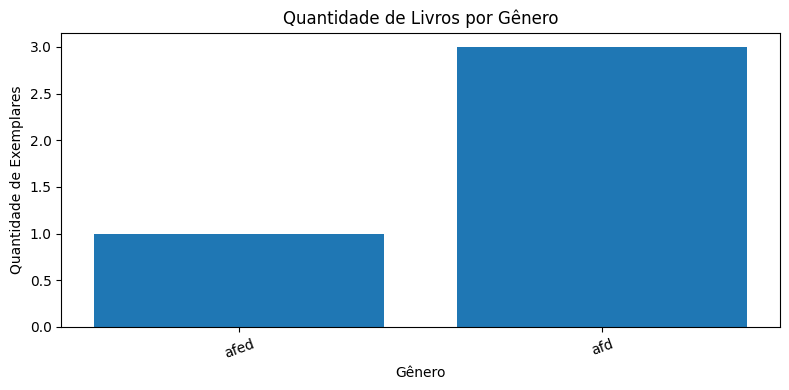

📊 Gráfico salvo como 'grafico_generos.png'.


In [ ]:
# Unidade 2 – Explorando Recursos do Python
# Atividade Prática
# Bruno Guimarães

import matplotlib.pyplot as plt
from collections import Counter

# -------- Utilidades --------
def safe_input(prompt: str, default: str | None = None) -> str | None:
    """
    Lê input do usuário. Se o usuário interromper a célula (Ctrl+C/Stop),
    retorna 'default' e não lança erro.
    """
    try:
        return input(prompt)
    except (KeyboardInterrupt, EOFError):
        print("\n[Entrada interrompida pelo usuário — seguindo com padrão]")
        return default

def read_int(prompt: str, minv: int | None = None, maxv: int | None = None) -> int:
    """
    Lê um inteiro com validação e mensagens amigáveis.
    """
    while True:
        s = safe_input(prompt)
        if s is None:  # interrupção -> usa 0
            return 0
        s = s.strip()
        if s == "":
            print("Por favor, digite um número.")
            continue
        try:
            n = int(s)
            if (minv is not None and n < minv) or (maxv is not None and n > maxv):
                print(f"Digite um número entre {minv} e {maxv}.")
                continue
            return n
        except ValueError:
            print("Valor inválido. Tente novamente (apenas números).")

# -------- Modelo --------
class Livro:
    def __init__(self, titulo: str, autor: str, genero: str, quantidade: int):
        self.titulo = titulo
        self.autor = autor
        self.genero = genero
        self.quantidade = quantidade

    def __str__(self) -> str:
        return f"{self.titulo} - {self.autor} | Gênero: {self.genero} | Qtde: {self.quantidade}"

# -------- Armazenamento --------
biblioteca: list[Livro] = []

# -------- Funções de gerenciamento --------
def cadastrar_livro():
    """Solicita dados ao usuário e adiciona um livro à biblioteca."""
    titulo = (safe_input("Digite o título do livro: ", default="") or "").strip()
    autor  = (safe_input("Digite o autor do livro: ",  default="") or "").strip()
    genero = (safe_input("Digite o gênero do livro: ", default="") or "").strip()
    quantidade = read_int("Digite a quantidade disponível: ", minv=0)

    livro = Livro(titulo, autor, genero, quantidade)
    biblioteca.append(livro)
    print(f"\n Livro '{titulo or '(sem título)'}' cadastrado com sucesso!\n")

def listar_livros():
    """Lista todos os livros cadastrados."""
    if not biblioteca:
        print("Nenhum livro cadastrado.")
        return
    print("\n Lista de Livros na Biblioteca:")
    for livro in biblioteca:
        print(livro)

def buscar_livro(titulo: str) -> Livro | None:
    """Busca um livro pelo título (case-insensitive)."""
    t = (titulo or "").strip().lower()
    for livro in biblioteca:
        if livro.titulo.lower() == t:
            return livro
    return None

# -------- Gráfico --------
def grafico_por_genero():
    """Gera e exibe o gráfico (e salva PNG) da quantidade de livros por gênero."""
    if not biblioteca:
        print("Não há livros cadastrados para gerar o gráfico.")
        return

    contagem = Counter()
    for livro in biblioteca:
        contagem[livro.genero or "Sem gênero"] += int(livro.quantidade)

    if not contagem:
        print("Não foi possível contabilizar os gêneros (verifique os cadastros).")
        return

    generos = list(contagem.keys())
    quantidades = list(contagem.values())

    # Salva antes de mostrar (boa prática) e exibe
    plt.figure(figsize=(8, 4))
    plt.bar(generos, quantidades)
    plt.title("Quantidade de Livros por Gênero")
    plt.xlabel("Gênero")
    plt.ylabel("Quantidade de Exemplares")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.savefig("grafico_generos.png", dpi=120, bbox_inches="tight")
    plt.show()
    print("Gráfico salvo como 'grafico_generos.png'.")

# ==============================
# FLUXO PRINCIPAL
# ==============================
while True:
    cadastrar_livro()
    continuar = (safe_input("Deseja cadastrar outro livro? (s/n): ", default="n") or "n").strip().lower()
    if continuar != "s":
        break

# Relatório final
listar_livros()

# Busca opcional (não trava se você interromper)
quer_buscar = (safe_input("\n Deseja buscar um livro pelo título? (s/n): ", default="n") or "n").strip().lower()
if quer_buscar == "s":
    titulo_busca = safe_input("Digite o título para buscar: ", default="")
    livro_encontrado = buscar_livro(titulo_busca or "")
    if livro_encontrado:
        print("\n Livro encontrado:", livro_encontrado)
    else:
        print("\n Livro não encontrado.")

# Geração do gráfico
grafico_por_genero()
